# DATAPRE Technical Report #

By Alon-alon, Cheng, Dela Cruz, Dizon, Evangelista

Sirs comment on our dataset:
<br>
Top Choice - If data will be coming from Kaggle, make sure you highlight how you applied preprocessing. Since data might be clean already, focus on feature engineering and descriptive analysis. Would also encourage the team to find a way to merge the analysis with other data sources if possible. Be creative with how you present the data and make sure that the question youre answering is clear. Suggestion on how you can answer the question in your top choice, check out ANOVA, regression, correlation and t tests :D Goodluck!!!

This technical report will explore the laptop market in order to get insights on its current state. Several questions will be tackled by tihs report: 
<br><br>
What are the common factors found among the current laptops in the market?
<br>
What are the common factors among the most sold laptops?

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
import numpy as np
from scipy.stats import ttest_ind

In order to explore the common factors ... two laptop datasets were found

laptops_1.csv: https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list by Santosh Kumar
<br>
laptops_2.csv: https://www.kaggle.com/datasets/ionaskel/laptop-prices by Ionas Kelepouris   
<br>

## Convert the .csv files into dataframes ##

In [76]:
df_laptops1 = pd.read_csv("datasets/laptops_1.csv")

In [77]:
df_laptops1

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0


In [78]:
df_laptops2 = pd.read_csv("datasets/laptops_2.csv",encoding='cp1252')

In [79]:
df_laptops2.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


The first task is to merge the two laptop datasets together into one. But after loading the two different laptop datasets, it was noticed that they did not have exactly the same columns. There are some columns that are similar but named differently. But there are also some columns that exist in one dataset but not in the other.

With this in mind, it is needed to make the column names of the table uniform and decide which columns would be worth keeping for the new combined dataset.

## Columns of each laptop dataset ##

In [80]:
print("Columns of laptop dataset 1")
print(df_laptops1.columns)

Columns of laptop dataset 1
Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')


In [81]:
print("Columns of laptop dataset 2")
print(df_laptops2.columns)

Columns of laptop dataset 2
Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


The columns of the new laptop dataset are to be 

In [82]:
new_columns = ['brand', 'model', 'processor', 'ram', 'memory', 'os', 'display_size', 'price', 'star_rating', 'ratings']
df_laptops = pd.DataFrame(columns=new_columns)
df_laptops

,brand,model,processor,ram,memory,os,display_size,price,star_rating,ratings


Each laptop dataset must first be cleaned in order for it to fit cohesively into this new dataset

# Initial dataset cleaning #

## Cleaning laptop dataset 1 ##

The first laptop dataset to be cleaned is currently stored in **`df_laptops1`**

In [83]:
df_laptops1

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0


In the new dataset, processor_brand and processor_name is combined into one column

In [84]:
df_laptops1['processor'] = df_laptops1['processor_brand'] + ' ' + df_laptops1['processor_name']
df_laptops1['processor']

0       AMD A6-9225 Processor
1                AMD APU Dual
2                AMD APU Dual
3                AMD APU Dual
4                AMD APU Dual
                ...          
891               AMD Ryzen 9
892               AMD Ryzen 9
893               AMD Ryzen 9
894    Qualcomm Snapdragon 7c
895               AMD Ryzen 5
Name: processor, Length: 896, dtype: object

The **`ram_gb`** column was also noticed to be incorrectly formatted, with GB being mentioned twice for all rows

In [85]:
df_laptops1['ram_gb']

0      4 GB GB
1      4 GB GB
2      4 GB GB
3      4 GB GB
4      4 GB GB
        ...   
891    4 GB GB
892    4 GB GB
893    4 GB GB
894    4 GB GB
895    8 GB GB
Name: ram_gb, Length: 896, dtype: object

By splitting each value in the **`ram_gb`** column and keeping the first two words, the format would now be aligned with the second dataset

In [86]:
df_laptops1['ram'] = df_laptops1['ram_gb'].apply(lambda x: x.split()[0] + x.split()[1])
df_laptops1['ram']

0      4GB
1      4GB
2      4GB
3      4GB
4      4GB
      ... 
891    4GB
892    4GB
893    4GB
894    4GB
895    8GB
Name: ram, Length: 896, dtype: object

**`ssd`** and **`hdd`** columns will also be combined into a column named memory

In [87]:
df_laptops1.loc[df_laptops1['hdd'] == '0 GB', ['memory']] = df_laptops1['ssd'] + ' SSD'
df_laptops1.loc[df_laptops1['ssd'] == '0 GB', ['memory']] = df_laptops1['hdd'] + ' HDD'
df_laptops1.loc[(df_laptops1['ssd'] != '0 GB') & (df_laptops1['hdd'] != '0 GB'), ['memory']] = df_laptops1['ssd'] + ' SSD + ' + df_laptops1['hdd'] + ' HDD'

In [88]:
df_laptops1['memory'] = df_laptops1['memory'].str.replace(' GB', 'GB')

In [89]:
df_laptops1.memory.value_counts()

512GB SSD                 412
256GB SSD                 128
1024GB SSD                111
1024GB HDD                 87
256GB SSD + 1024GB HDD     73
512GB HDD                  63
128GB SSD                  11
512GB SSD + 1024GB HDD      3
512GB SSD + 512GB HDD       2
2048GB SSD                  2
128GB SSD + 1024GB HDD      1
3072GB SSD                  1
2048GB HDD                  1
32GB SSD                    1
Name: memory, dtype: int64

As the laptop dataset 1 has two price columns (old price and latest price), only the latest price will be kept as this report tries to explore the current state of the laptop market

In [90]:
df_laptops1['price'] = df_laptops1['latest_price']

Also, it was noticed that the currency of the two laptop datasets are different. So in order to make it uniform the currency is to be converted in to USD.

For laptop dataset 1, the prices are in Indian Rupee (INR).

In [91]:
INR_to_USD = 0.013
df_laptops1['price'] = df_laptops1['price'] * INR_to_USD

## Append the cleaned laptop 1 columns to the new dataframe ##

In [92]:
df_laptops1_cols = df_laptops1[['brand', 'model', 'processor', 'ram', 'memory', 'os',
                                'display_size', 'price', 'star_rating', 'ratings']]

df_laptops = df_laptops.append(df_laptops1_cols)
df_laptops

,brand,model,processor,ram,memory,os,display_size,price,star_rating,ratings
0,Lenovo,A6-9225,AMD A6-9225 Processor,4GB,1024GB HDD,Windows,Missing,324.87,3.7,63
1,Lenovo,Ideapad,AMD APU Dual,4GB,512GB HDD,Windows,Missing,254.67,3.6,1894
2,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,259.87,3.7,1153
3,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,279.37,3.7,1153
4,Avita,PURA,AMD APU Dual,4GB,256GB SSD,Windows,Missing,324.87,3.7,1657
...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD Ryzen 9,4GB,1024GB SSD,Windows,16,1884.87,0.0,0
892,ASUS,Ryzen,AMD Ryzen 9,4GB,1024GB SSD,Windows,Missing,1949.87,0.0,0
893,ASUS,Ryzen,AMD Ryzen 9,4GB,1024GB SSD,Windows,16,1858.87,0.0,0
894,SAMSUNG,Galaxy,Qualcomm Snapdragon 7c,4GB,512GB HDD,Windows,Missing,506.87,0.0,0


## Cleaning laptop dataset 2 ##

The second laptop dataset to be cleaned is stored in **`df_laptops2`**

In [93]:
df_laptops2

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


Firstly, the columns should be renamed in order to be the same with the new dataset

In [94]:
df_laptops2.rename(columns = {'Company':'brand', 'Product':'model', 'Inches':'display_size', 'Cpu':'processor',
                              'Price_euros':'price', 'OpSys':'os', 'Ram':'ram', 'Memory':'memory'}, inplace = True)

It was noticed that in the memory column, there were many excess spaces so this had to be fixed

In [95]:
df_laptops2['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
32GB HDD                           1
6

In [96]:
df_laptops2['memory'] = df_laptops2['memory'].apply(lambda x: ' '.join(x.split()))

In [97]:
df_laptops2['memory'].value_counts()

256GB SSD                       412
1TB HDD                         223
500GB HDD                       132
512GB SSD                       118
128GB SSD + 1TB HDD              94
128GB SSD                        76
256GB SSD + 1TB HDD              73
32GB Flash Storage               38
2TB HDD                          16
64GB Flash Storage               15
512GB SSD + 1TB HDD              14
1TB SSD                          14
256GB SSD + 2TB HDD              10
1.0TB Hybrid                      9
256GB Flash Storage               8
16GB Flash Storage                7
32GB SSD                          6
180GB SSD                         5
128GB Flash Storage               4
512GB SSD + 2TB HDD               3
16GB SSD                          3
512GB Flash Storage               2
256GB SSD + 256GB SSD             2
256GB SSD + 500GB HDD             2
1TB SSD + 1TB HDD                 2
128GB SSD + 2TB HDD               2
240GB SSD                         1
128GB HDD                   

Just like with the prior dataset, the price column must be converted in the a uniform currency for the new dataset (USD).

For laptop dataset 2, the prices are in euro.

In [98]:
EUR_to_USD = 1.06
df_laptops2['price'] = df_laptops2['price'] * EUR_to_USD

The new dataset will also contain the **`ratings`** and **`star_rating column`**, however as this laptop dataset does not originally contain this, values will be initially set to zero

In [99]:
df_laptops2['star_rating'] = 0.0
df_laptops2['ratings'] = 0

## Append the cleaned laptop 2 columns to the new dataframe ##

In [100]:
df_laptops2_cols = df_laptops2[['brand', 'model', 'processor', 'ram', 'memory', 'os',
                                'display_size', 'price', 'star_rating', 'ratings']]

df_laptops = df_laptops.append(df_laptops2_cols)
df_laptops

,brand,model,processor,ram,memory,os,display_size,price,star_rating,ratings
0,Lenovo,A6-9225,AMD A6-9225 Processor,4GB,1024GB HDD,Windows,Missing,324.87,3.7,63
1,Lenovo,Ideapad,AMD APU Dual,4GB,512GB HDD,Windows,Missing,254.67,3.6,1894
2,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,259.87,3.7,1153
3,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,279.37,3.7,1153
4,Avita,PURA,AMD APU Dual,4GB,256GB SSD,Windows,Missing,324.87,3.7,1657
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Windows 10,14.0,676.28,0.0,0
1299,Lenovo,Yoga 900-13ISK,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,13.3,1588.94,0.0,0
1300,Lenovo,IdeaPad 100S-14IBR,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Windows 10,14.0,242.74,0.0,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,Windows 10,15.6,809.84,0.0,0


## Now the two datasets have been combined! ##

With a new total of 2199 rows, coming from 896 records in the first dataset and 1303 records in the second dataset

In [101]:
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         2199 non-null   object 
 1   model         2199 non-null   object 
 2   processor     2199 non-null   object 
 3   ram           2199 non-null   object 
 4   memory        2199 non-null   object 
 5   os            2199 non-null   object 
 6   display_size  2199 non-null   object 
 7   price         2199 non-null   float64
 8   star_rating   2199 non-null   float64
 9   ratings       2199 non-null   object 
dtypes: float64(2), object(8)
memory usage: 189.0+ KB


## More Data Cleaning ##

Now that the two laptop datasets have been combined into one, the data must be double checked for more inconsistencies

In [102]:
df_laptops.brand.value_counts()

Lenovo       445
HP           416
Dell         297
ASUS         254
Asus         158
DELL         154
MSI          106
Acer         103
acer          58
Toshiba       48
APPLE         28
Apple         21
Avita         18
Samsung        9
LG             8
Mediacom       7
Razer          7
Microsoft      6
Vaio           5
realme         4
Xiaomi         4
Nokia          4
ALIENWARE      4
Infinix        4
Vero           4
Fujitsu        3
MICROSOFT      3
Smartron       3
Chuwi          3
Google         3
lenovo         3
RedmiBook      3
Mi             2
Huawei         2
iball          1
SAMSUNG        1
Name: brand, dtype: int64

As you can see for the values found in the brand column, there are duplicate entries of different font cases such as "DELL" - "Dell"  or "APPLE" - "Apple".

A simple fix would be to turn these all to lower case in order to make the data uniform, and then proceed to capitalize the first letter as most brands capitalize the first letter in their brand.



In [103]:
df_laptops['brand'] = df_laptops['brand'].str.lower()
df_laptops['brand'] = df_laptops['brand'].str.title()

In [104]:
df_laptops.brand.value_counts()

Dell         451
Lenovo       448
Hp           416
Asus         412
Acer         161
Msi          106
Apple         49
Toshiba       48
Avita         18
Samsung       10
Microsoft      9
Lg             8
Mediacom       7
Razer          7
Vaio           5
Vero           4
Nokia          4
Xiaomi         4
Infinix        4
Alienware      4
Realme         4
Fujitsu        3
Redmibook      3
Google         3
Chuwi          3
Smartron       3
Huawei         2
Mi             2
Iball          1
Name: brand, dtype: int64

Checking for missing data

In [105]:
df_laptops.isnull().any()

brand           False
model           False
processor       False
ram             False
memory          False
os              False
display_size    False
price           False
star_rating     False
ratings         False
dtype: bool

> Because there is no missing data in this dataset, there is no need to make sure that all the missing values are represented as **Nan** or **None**.

Checking for duplicate data

In [106]:
df_laptops.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298     True
1299     True
1300     True
1301     True
1302     True
Length: 2199, dtype: bool

In [107]:
df_laptops.duplicated().sum()

53

> We used the **`duplicated()`** function of pandas to check if there are duplicated rows in the dataset. Since there are 53 rows that returned **True**, we use the **`drop_duplicates()`** function to drop the duplicated rows. 

In [108]:
df_laptops = df_laptops.drop_duplicates()

Check if there are no duplicated rows left

In [109]:
df_laptops.duplicated().sum()

0

> **`drop_duplicates()`** was successful since the code above returned 0 rows. 

All the brands are now uniformed for any further data processing

In [110]:
df_laptops.brand.value_counts()

Dell         443
Lenovo       440
Hp           409
Asus         399
Acer         159
Msi          106
Toshiba       48
Apple         44
Avita         10
Samsung       10
Microsoft      9
Mediacom       7
Lg             7
Razer          7
Vaio           5
Vero           4
Nokia          4
Xiaomi         4
Alienware      4
Realme         4
Fujitsu        3
Redmibook      3
Google         3
Chuwi          3
Smartron       3
Infinix        3
Huawei         2
Mi             2
Iball          1
Name: brand, dtype: int64

# Analysis of the Laptop Data #

Now that the data has been cleaned and sorted, the data analysis process can now begin
<br>
<br>

## Common Laptop Brands Found in the Dataset ##

Which laptop brand has the most number of unique models being sold based on the data provided?

In [111]:
df_brands = pd.DataFrame(df_laptops['brand'].value_counts()).reset_index()
df_brands.columns = ['brand', 'counts']

In [112]:
df_brands

,brand,counts
0,Dell,443
1,Lenovo,440
2,Hp,409
3,Asus,399
4,Acer,159
5,Msi,106
6,Toshiba,48
7,Apple,44
8,Avita,10
9,Samsung,10


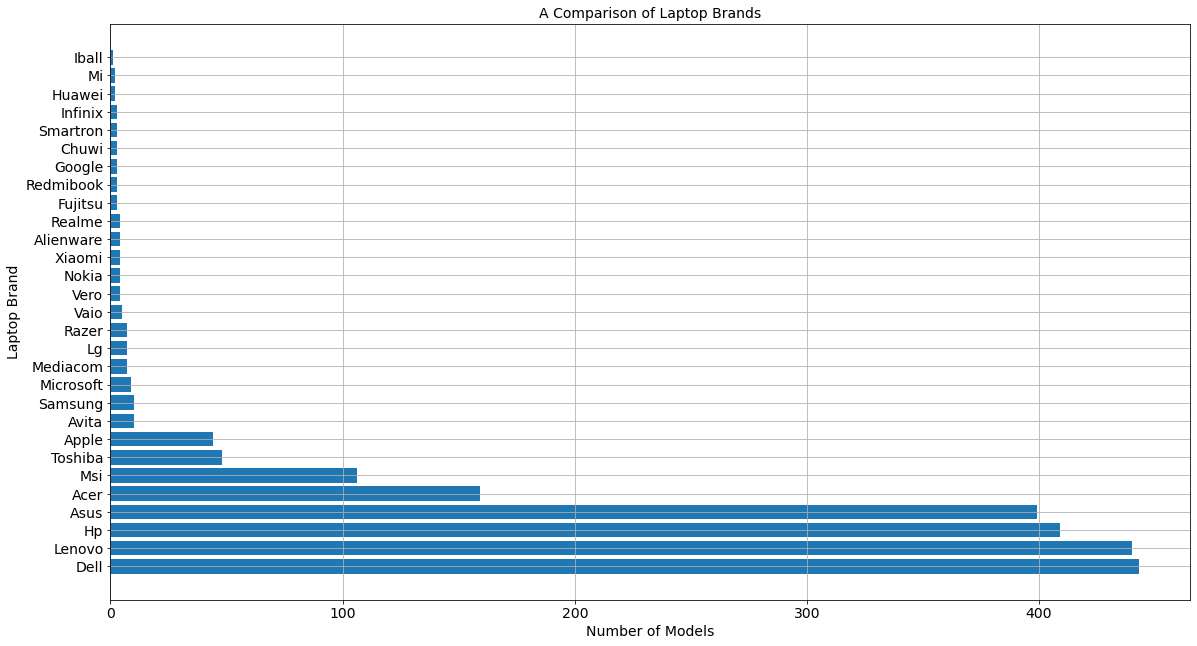

In [113]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes([0,0,1,1])
ax.barh(df_brands.brand, df_brands.counts)

plt.title("A Comparison of Laptop Brands", fontsize=14)
plt.xlabel("Number of Models", fontsize=14)
plt.ylabel("Laptop Brand", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid()
plt.show()

Based on the data, this chart shows that the top five brands with different models being sold are: 

In [114]:
df_brands.nlargest(5, 'counts')

,brand,counts
0,Dell,443
1,Lenovo,440
2,Hp,409
3,Asus,399
4,Acer,159


## Which among the laptop brands have the highest average star rating ##

For this question, the average of the star ratings per brand will be computed for. However, there are many laptops which have not yet been rated yet which would bring down the averages. In order to fix this, these laptops that not have been rated will be removed.

In [115]:
# Laptops that have not yet been rated yet bring down the brand's overall average star rating #
pd.DataFrame(df_laptops.groupby('brand').mean()['star_rating'])

,star_rating
brand,
Acer,1.114465
Alienware,4.400000
Apple,2.463636
Asus,1.684712
Avita,2.910000
Chuwi,0.000000
Dell,0.995485
Fujitsu,0.000000
Google,0.000000


In [116]:
# Taking out the laptops which have not yet been rated yet #
df_star_brands = df_laptops[(df_laptops['ratings'] > 0)]
df_star_brands

,brand,model,processor,ram,memory,os,display_size,price,star_rating,ratings
0,Lenovo,A6-9225,AMD A6-9225 Processor,4GB,1024GB HDD,Windows,Missing,324.87,3.7,63
1,Lenovo,Ideapad,AMD APU Dual,4GB,512GB HDD,Windows,Missing,254.67,3.6,1894
2,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,259.87,3.7,1153
3,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,279.37,3.7,1153
4,Avita,PURA,AMD APU Dual,4GB,256GB SSD,Windows,Missing,324.87,3.7,1657
...,...,...,...,...,...,...,...,...,...,...
877,Asus,ROG,AMD Ryzen 9,4GB,1024GB SSD,Windows,16,1624.87,5.0,3
881,Asus,ROG,AMD Ryzen 9,4GB,1024GB SSD,Windows,Missing,1858.87,4.0,4
883,Asus,ROG,AMD Ryzen 9,4GB,1024GB SSD,Windows,Missing,1624.87,4.2,44
884,Asus,ROG,AMD Ryzen 9,4GB,1024GB SSD,Windows,16,1845.87,4.2,61


In [117]:
df_star_brands = df_star_brands.groupby('brand').mean().reset_index()
df_star_brands = df_star_brands[['brand', 'star_rating']]

In [118]:
df_star_brands = df_star_brands.sort_values(by='star_rating', ascending=False)
df_star_brands

,brand,star_rating
2,Apple,4.713043
10,Lg,4.550000
13,Msi,4.410811
15,Realme,4.400000
1,Alienware,4.400000
14,Nokia,4.300000
3,Asus,4.281529
6,Hp,4.267925
16,Redmibook,4.266667
11,Mi,4.250000


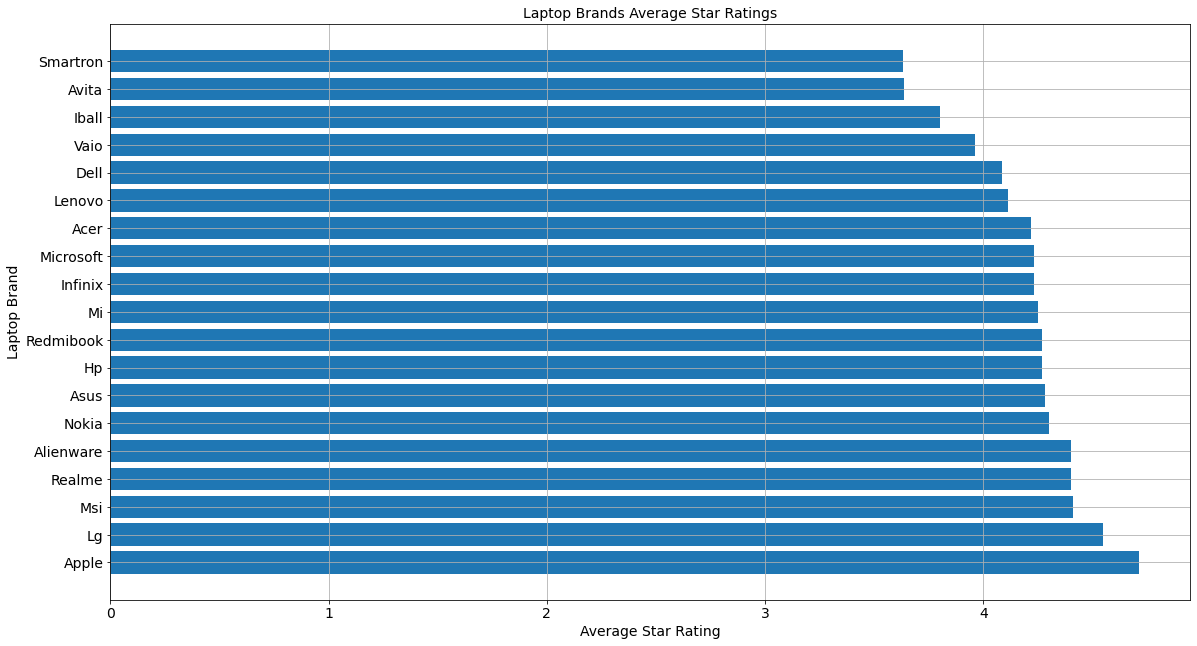

In [119]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes([0,0,1,1])
ax.barh(df_star_brands.brand, df_star_brands.star_rating)

plt.title("Laptop Brands Average Star Ratings", fontsize=14)
plt.xlabel("Average Star Rating", fontsize=14)
plt.ylabel("Laptop Brand", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid()
plt.show()

## Common Processor Brands Found in Laptops ##

In order to find out what processor brand is most common in the market, the processors of the same brands must be grouped together

In [120]:
df_processors = pd.DataFrame(df_laptops['processor'].value_counts()).reset_index()
df_processors.columns = ['processor', 'counts']
df_processors

,processor,counts
0,Intel Core i5,305
1,Intel Core i5 7200U 2.5GHz,190
2,Intel Core i3,166
3,Intel Core i7 7700HQ 2.8GHz,146
4,Intel Core i7 7500U 2.7GHz,132
...,...,...
143,Intel Dual Core,1
144,Intel Core i5 7200U 2.7GHz,1
145,Intel Pentium Dual Core 4405Y 1.5GHz,1
146,Intel Core i7 6560U 2.2GHz,1


In [121]:
df_processors['processor'] = df_processors['processor'].apply(lambda x: x.split()[0])
df_processors

,processor,counts
0,Intel,305
1,Intel,190
2,Intel,166
3,Intel,146
4,Intel,132
...,...,...
143,Intel,1
144,Intel,1
145,Intel,1
146,Intel,1


In [122]:
df_processors_grouped = df_processors.groupby('processor').sum().sort_values('counts', ascending=False)
df_processors_grouped.reset_index(inplace=True)
df_processors_grouped

,processor,counts
0,Intel,1856
1,AMD,267
2,M1,19
3,MediaTek,2
4,Qualcomm,1
5,Samsung,1


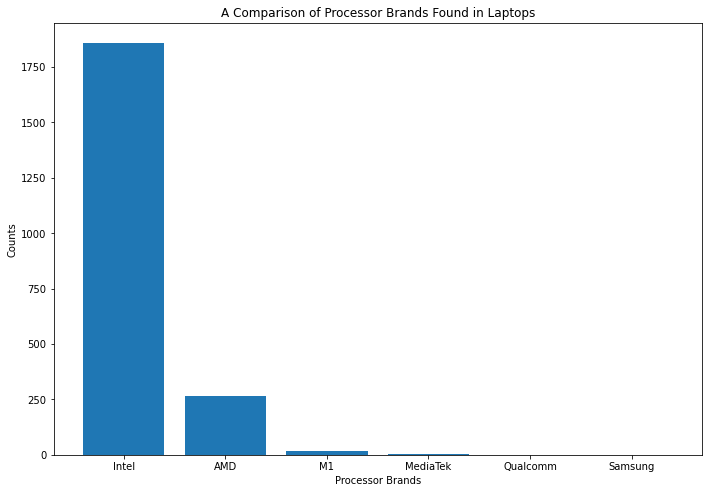

In [123]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_processors_grouped.processor,df_processors_grouped.counts)

plt.title("A Comparison of Processor Brands Found in Laptops")
plt.xlabel("Processor Brands")
plt.ylabel("Counts")
plt.show()

From this chart it is clearly seen that Intel rules the laptop market in terms of processors. With Intel processors being found in 1,900 different laptop. AMD processors are a far second, being found in 270 laptops. 

In [124]:
df_laptops.brand.value_counts()

Dell         443
Lenovo       440
Hp           409
Asus         399
Acer         159
Msi          106
Toshiba       48
Apple         44
Avita         10
Samsung       10
Microsoft      9
Mediacom       7
Lg             7
Razer          7
Vaio           5
Vero           4
Nokia          4
Xiaomi         4
Alienware      4
Realme         4
Fujitsu        3
Redmibook      3
Google         3
Chuwi          3
Smartron       3
Infinix        3
Huawei         2
Mi             2
Iball          1
Name: brand, dtype: int64

## Laptop Brand Pricing ##

In this section we take a look at how the different brands price their laptops. Different charts will be used in order to help with visualization.

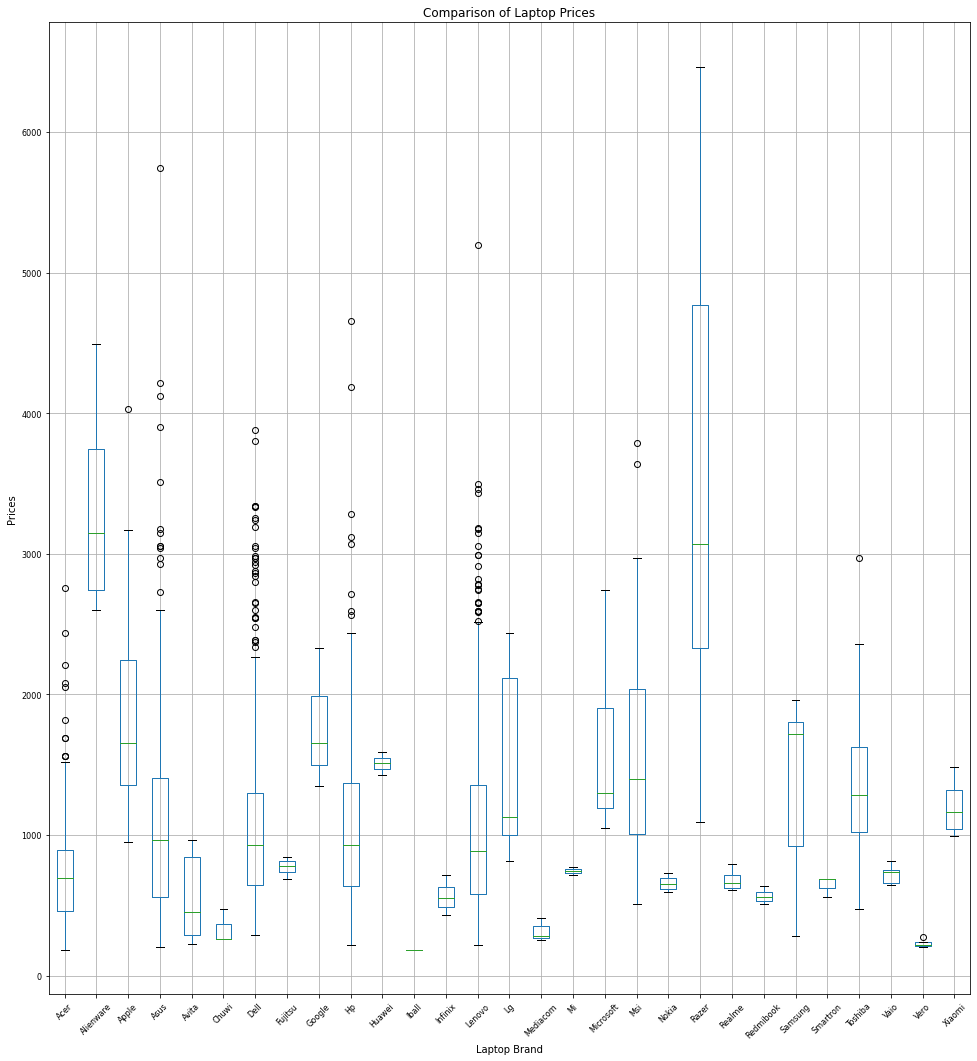

In [125]:
df_laptops.boxplot(column='price',by='brand',figsize=(16,18),fontsize=8,rot=45)
plt.title('Comparison of Laptop Prices')
plt.suptitle('')
plt.xlabel("Laptop Brand")
plt.ylabel("Prices")
plt.show()

From the chart, there are laptop brands which have multiple outliers. This could be attributed to some brands having laptops for different customer budgets. These brands may be selling "lower end" and "higher end" laptops in terms of specifications. While brands like Alienware and Razer are noticed to just sell higher priced laptops.

### Top 10 Most Expensive Laptops in the Dataset ##

In [126]:
df_laptops[['brand', 'model', 'price']].nlargest(10, 'price')

,brand,model,price
196,Razer,Blade Pro,6464.940
830,Razer,Blade Pro,5828.940
636,Asus,Zephyrus,5745.870
610,Lenovo,Thinkpad P51,5192.940
749,Hp,Zbook 17,4652.340
649,Alienware,Missing,4490.070
1066,Asus,ROG G701VO,4213.500
1136,Hp,ZBook 17,4186.364
238,Asus,ROG G703VI-E5062T,4123.400
677,Apple,MacBook,4029.870


In order to visualize which brand has the most number of expensive laptops in the top 10 spot we can use a pie chart in order to visualize the dominance of each brand in terms of price points

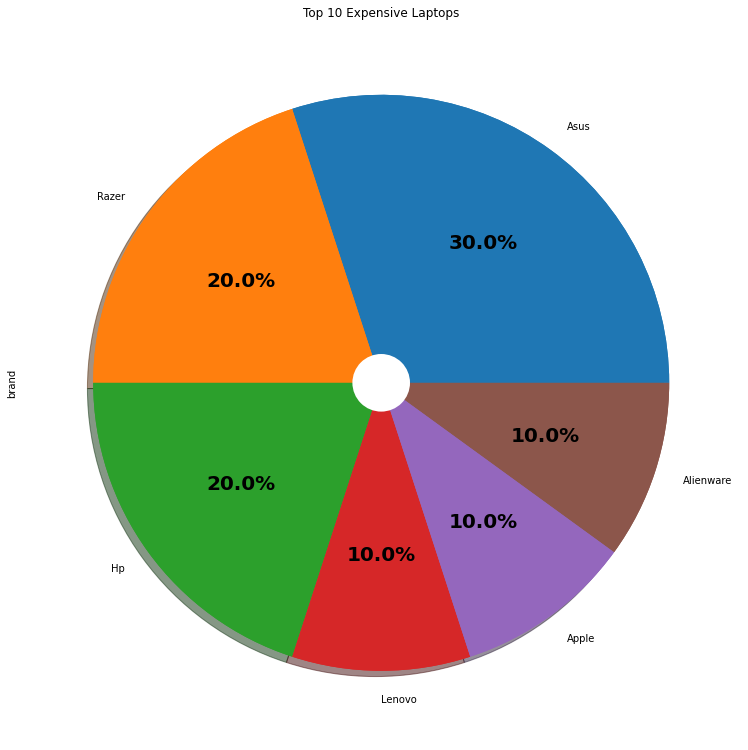

In [127]:
df_top10_expensive = df_laptops[['brand', 'model', 'price']].nlargest(10, 'price')

fig = plt.figure(figsize=(10, 10), facecolor='white')
ax = fig.add_axes([0,0,1,1])

# explode1 = [0.2,0,0,0,0,0]

ax = df_top10_expensive["brand"].value_counts().plot(kind="pie")
ax.pie(df_top10_expensive["brand"].value_counts(), autopct='%1.1f%%', textprops={'fontsize': 20, 'fontweight':'bold'},
       shadow= True)

ax.set_title("Top 10 Expensive Laptops")

centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



As we can see from the pie chart, Asus occupies 30% of the top 10 spot of the most expensive laptops followed by HP and Razer occupying 20% each. Meanwhile Lenovo, Alienware and Apple only occupy 10% of the top 10 spot.

### Top 10 Cheapest Laptops in the Dataset ###

In [128]:
df_laptops[['brand', 'model', 'price']].nsmallest(10, 'price')

,brand,model,price
683,Iball,CompBook,181.870
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,184.440
20,Asus,Vivobook E200HA,203.414
1120,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),207.760
31,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),210.940
290,Acer,Chromebook C910-C2ST,210.940
791,Vero,K146 (N3350/4GB/32GB/W10),215.074
211,Lenovo,IdeaPad,220.870
1102,Acer,Chromebook 15,221.540
1268,Hp,Stream 11-Y000na,221.540


The same way we visualized the Top 10 Most Expensive Laptops, we can also visualize the top 10 Cheapest Laptops in the same manner.

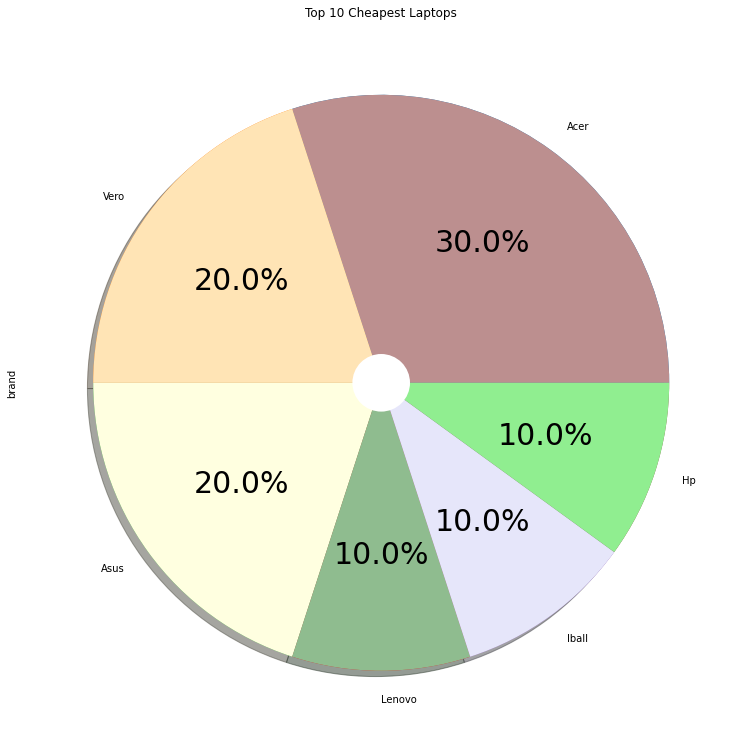

In [129]:
df_top10_cheap = df_laptops[['brand', 'model', 'price']].nsmallest(10, 'price')

fig = plt.figure(figsize=(10, 10), facecolor='white')
ax = fig.add_axes([0,0,1,1])

# explode1 = [0.2,0,0,0,0,0]
colors=['rosybrown', 'moccasin', 'lightyellow', 'darkseagreen', 
        'lavender', 'lightgreen']

ax = df_top10_cheap["brand"].value_counts().plot(kind="pie")
ax.pie(df_top10_cheap["brand"].value_counts(), autopct='%1.1f%%', textprops={'fontsize': 30},
       shadow=True, colors=colors)

ax.set_title("Top 10 Cheapest Laptops")

centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


As we can see from the pie chart, Acer occupies 30% of the top 10 spot of the cheapest laptops followed by Asus and Vero occupying 20% each. Meanwhile Lenovo, Iball and HP only occupy 10% of the top 10 spot.

Now we will compare the averages of laptop prices across brands

In [130]:
df_avg_laptop_prices = pd.DataFrame(df_laptops.groupby('brand')['price'].mean().sort_values(ascending=False))
df_avg_laptop_prices.reset_index(inplace=True)
df_avg_laptop_prices

,brand,price
0,Razer,3546.911429
1,Alienware,3345.745000
2,Apple,1858.781141
3,Google,1778.326667
4,Microsoft,1561.400889
5,Msi,1555.234957
6,Lg,1518.042857
7,Huawei,1509.440000
8,Samsung,1399.113000
9,Toshiba,1343.881250


In [132]:
# Average price of laptops in the dataset #
df_laptops['price'].mean()

1117.259484156564

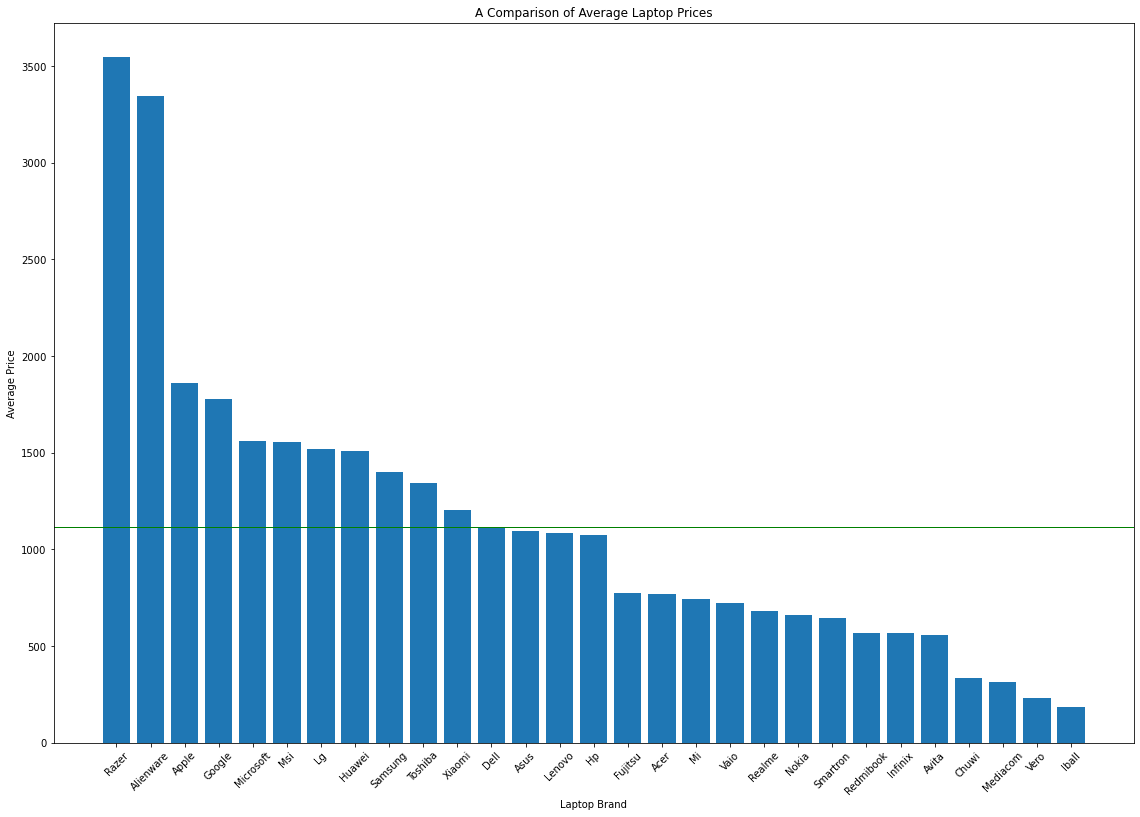

In [57]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_avg_laptop_prices.brand,df_avg_laptop_prices.price)

plt.axhline(y=df_laptops['price'].mean(),linewidth=1, color='g')

plt.title("A Comparison of Average Laptop Prices")
plt.xlabel("Laptop Brand")
plt.ylabel("Average Price")
plt.xticks(fontsize=10, rotation=45)
plt.show()

From the chart, the green horizontal line represents the average price of all laptops in the dataset. It is seen that 11 brands sell laptops above this threshold (Razer, Alienware, Apple, Google, Microsoft, Msi, Huawei, Lg, Samsung, Toshiba, Xiaomi).

### Knowing the Relationship of Star Rating and Price of the Laptops

In [58]:
df_laptops_srates= df_laptops[df_laptops['star_rating'] != 0]
df_laptops_srates

,brand,model,processor,ram,memory,os,display_size,price,star_rating,ratings
0,Lenovo,A6-9225,AMD A6-9225 Processor,4GB,1024GB HDD,Windows,Missing,324.87,3.7,63
1,Lenovo,Ideapad,AMD APU Dual,4GB,512GB HDD,Windows,Missing,254.67,3.6,1894
2,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,259.87,3.7,1153
3,Avita,PURA,AMD APU Dual,4GB,128GB SSD,Windows,Missing,279.37,3.7,1153
4,Avita,PURA,AMD APU Dual,4GB,256GB SSD,Windows,Missing,324.87,3.7,1657
...,...,...,...,...,...,...,...,...,...,...
877,Asus,ROG,AMD Ryzen 9,4GB,1024GB SSD,Windows,16,1624.87,5.0,3
881,Asus,ROG,AMD Ryzen 9,4GB,1024GB SSD,Windows,Missing,1858.87,4.0,4
883,Asus,ROG,AMD Ryzen 9,4GB,1024GB SSD,Windows,Missing,1624.87,4.2,44
884,Asus,ROG,AMD Ryzen 9,4GB,1024GB SSD,Windows,16,1845.87,4.2,61


In [59]:
df_laptops_srates1 = df_laptops_srates.groupby('brand')['star_rating'].mean()
df_laptops_srates2 = df_laptops_srates.groupby('brand')['price'].mean()
df_laptops_srates = pd.concat([df_laptops_srates1, df_laptops_srates2],axis=1)
df_laptops_srates = df_laptops_srates.sort_values('star_rating')
df_laptops_srates 

,star_rating,price
brand,,
Smartron,3.633333,645.536667
Avita,3.637500,471.238625
Iball,3.800000,181.870000
Vaio,3.960000,723.970000
Dell,4.083333,771.059491
Lenovo,4.114019,781.462318
Acer,4.219048,916.926214
Infinix,4.233333,565.370000
Microsoft,4.233333,1266.109000


The values above are the price and star rating of each laptops sorted from the lowest rated to the highest rated

In [60]:
df_laptops_srates.sort_values('price')

,star_rating,price
brand,,
Iball,3.800000,181.870000
Avita,3.637500,471.238625
Infinix,4.233333,565.370000
Redmibook,4.266667,567.536667
Smartron,3.633333,645.536667
Nokia,4.300000,658.970000
Realme,4.400000,679.178500
Vaio,3.960000,723.970000
Mi,4.250000,744.120000


The values above are the price and star rating of each laptops sorted from the cheapest to the most expensive

<AxesSubplot:xlabel='star_rating'>

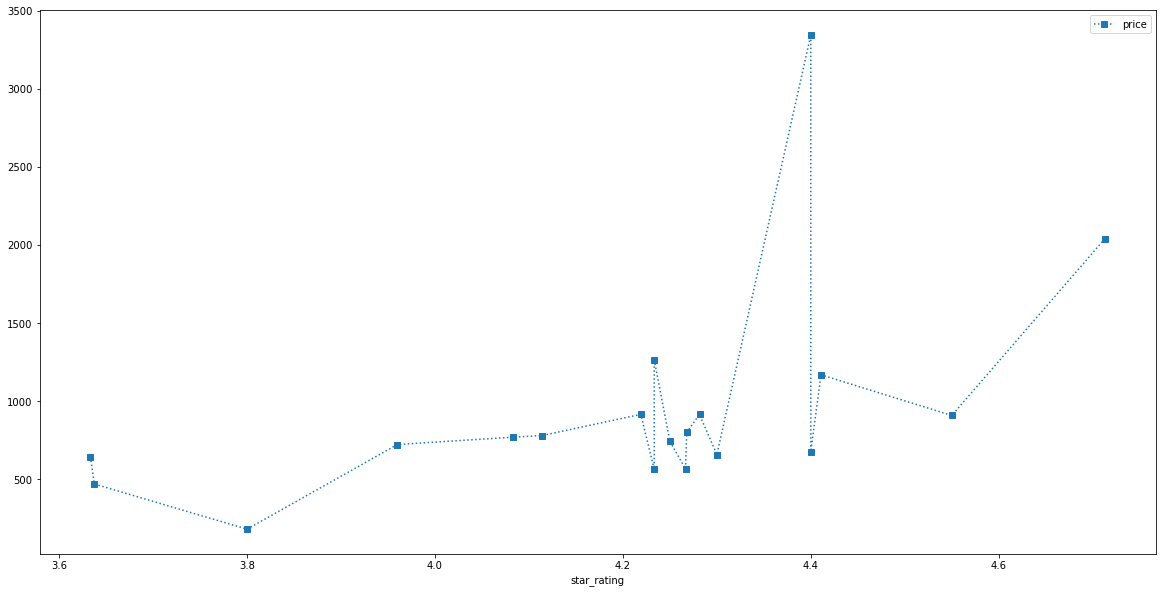

In [61]:
df_laptops_srates.plot.line(x='star_rating', y='price',style='s:',figsize=(20,10))



Based on the graph shown the price is almost proportional to the star rating but has an outlier in one of the brands which is alienware where the price is very high yet it's only the 5th highest rating among the brands. Comparing the price of the highest rating laptop Apple the price comes in the 2nd highest while the lowest rating laptop Smartron is the 5th cheapest laptop. From the data shown we can say that the cheaper laptops are rated lower compared to expensive laptops

# T-Test

This section will see which operating systems are common in the laptops found in the dataset

The **`os`** column contains different versions for some operating systems. These will be combined in order to get a better comparison.

In [62]:
df_laptops['os'].value_counts()

Windows 10      1047
Windows          814
No OS             66
Linux             58
Windows 7         45
DOS               35
Chrome OS         27
Mac               23
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: os, dtype: int64

In [63]:
df_os = df_laptops['os'].apply(lambda x: x.split()[0])
df_os.value_counts()

Windows    1914
No           66
Linux        58
DOS          35
Mac          31
Chrome       27
macOS        13
Android       2
Name: os, dtype: int64

In [64]:
df_os = df_os.replace('macOS', 'Mac')
df_os = df_os.replace('No', 'None')

df_os = pd.DataFrame(df_os.value_counts())

df_os.reset_index(inplace=True)
df_os.columns = ['os', 'counts']

In [65]:
df_os

,os,counts
0,Windows,1914
1,None,66
2,Linux,58
3,Mac,44
4,DOS,35
5,Chrome,27
6,Android,2


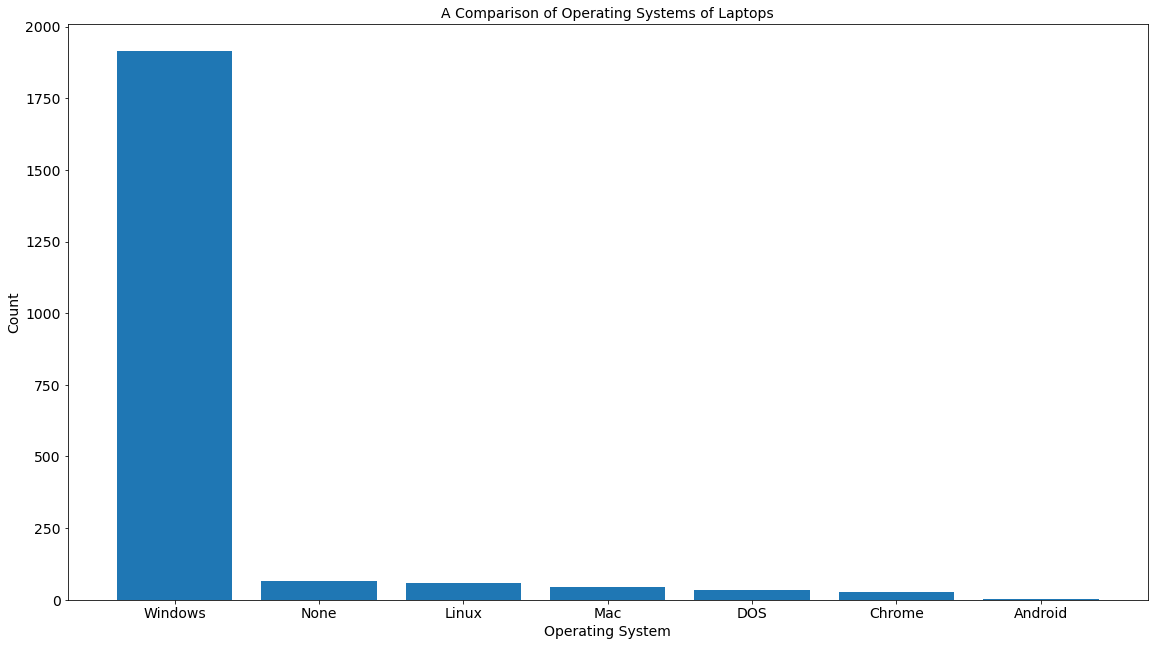

In [66]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_os.os, df_os.counts)

plt.title("A Comparison of Operating Systems of Laptops", fontsize=14)
plt.xlabel("Operating System", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Based on the data, Windows is the most common operating system used in laptops, with a total of 1914 laptops that use it.

## Is there a significant price difference between laptops of different RAM ##

In order to answer this, the average prices of laptops per each amount of RAM will be sorted.

In [67]:
df_laptops['ram'].value_counts()

8GB     1050
4GB      622
16GB     374
6GB       35
12GB      25
32GB      20
2GB       16
24GB       3
64GB       1
Name: ram, dtype: int64

In [68]:
df_ram_price = df_laptops.groupby('ram').mean().reset_index() 
df_ram_price = df_ram_price.drop('star_rating', axis=1)

In [69]:
df_ram_price['gb'] = df_ram_price['ram'].apply(lambda x: x.split('GB')[0])
df_ram_price['gb'] = df_ram_price['gb'].astype('int')

df_ram_price = df_ram_price.sort_values(by=['gb'])
df_ram_price

,ram,price,gb
3,2GB,262.492437,2
5,4GB,679.500726,4
7,6GB,656.517966,6
8,8GB,1100.945831,8
0,12GB,1313.804704,12
1,16GB,1817.246735,16
2,24GB,2338.713333,24
4,32GB,3404.661730,32
6,64GB,4213.500000,64


For each increasing level of RAM, the P-value will be computed for in order to see if there is a significant difference between the prices. The P-value for 32GB to 64GB will not be included as it returns a nan value due to there being only one 64GB laptop in the dataset.

In [70]:
tstat_list = []
pval_list = []

for i in range(0, len(df_ram_price) - 2):
    
    current_ram = df_ram_price.iloc[i]['ram']
    compare_ram = df_ram_price.iloc[i + 1]['ram'] # compare the ram 1 level above
    
    tstat, pval = stats.ttest_ind(df_laptops[df_laptops['ram'] == current_ram]['price'],
               df_laptops[df_laptops['ram'] == compare_ram]['price'])
    
    print(current_ram, " vs ", compare_ram, "| p-value:", pval, end=' | ')
    
    if pval < 0.05:
        print("Significant difference")
    else:
        print("")
    
    tstat_list.append(tstat)
    pval_list.append(pval)

2GB  vs  4GB | p-value: 1.962484687231973e-05 | Significant difference
4GB  vs  6GB | p-value: 0.726727102566598 | 
6GB  vs  8GB | p-value: 3.145841264555194e-07 | Significant difference
8GB  vs  12GB | p-value: 0.03934230093680534 | Significant difference
12GB  vs  16GB | p-value: 0.0006997384003374427 | Significant difference
16GB  vs  24GB | p-value: 0.21612254512221515 | 
24GB  vs  32GB | p-value: 0.21378895474508416 | 


## Data normalization (Processor and Memory)

In [71]:
d = np.log(df_laptops[(df_laptops['processor'] == 'Intel Core i5') & (df_laptops['memory'] == '256GB SSD')]['price'])
scaled_i5_df = pd.DataFrame(d)
scaled_i5_df

,price
27,6.745319
229,6.466720
231,7.029328
232,6.908625
233,6.908625
234,6.456566
235,6.707925
236,6.590122
237,6.971644
239,7.481933


In [72]:
d = np.log(df_laptops[(df_laptops['processor'] == 'Intel Core i5 7200U 2.5GHz') & (df_laptops['memory'] == '256GB SSD')]['price'])
scaled_i5U_df = pd.DataFrame(d)
scaled_i5U_df

,price
2,6.412639
48,6.518173
57,6.431913
64,6.594961
87,6.453514
...,...
1194,7.147512
1205,6.848366
1206,6.419571
1213,6.965024


The difference in the means of the **top 2 most used processors with the most common memory (256 SSD)** Intel Core i5 and Intel Core i5 7200U 2.5GHz is:

In [73]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

i5_mean = scaled_i5_df.mean()['price'] 
i5U_mean = scaled_i5U_df.mean()['price'] 
diff = i5U_mean - i5_mean
print('{:.2f}'.format(diff))

0.19


### Hypothesis Test

Setting up the hypothesis test...

$H_0$ (null hypothesis): The true difference between the two means is 0. 

$H_A$ (alternative hypothesis): The true difference between the two means is not 0.

### **Testing for unpaired observations (T-test)**
We ought to use an unpaired t-test since we are comparing the mean between two independent variables.

In [74]:
ttest_ind(scaled_i5U_df['price'],
        scaled_i5_df['price'],
        equal_var = False)

Ttest_indResult(statistic=2.198227664733088, pvalue=0.04202209989581292)

Using the significance level 0.05, the $p$-value 0.04202 is ***statistically significant***. Since the $p$-value is less than the significance level, we should ***reject the null hypothesis***. Therefore, the data provide strong evidence that there is a significant difference between the prices of the top 2 used CPUs with the most common memory (256 SSD) at a significance level of 5%. This shows that there are more factors that affect the price of a laptop other than the CPU and SSD. 


## Conclusions and Recommendations ##

- There are trends and differences seen among laptop brands in terms of prices, ratings, variety in products sold
- Windows is the dominant operating system being used and Intel as the dominant processor brand  
- The dataset can be further expanded by collecting more data in order to get more accurate results
